<a href="https://colab.research.google.com/github/wamaithaNyamu/RUNDAHOUSES/blob/master/Runda_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# INTRODUCTION

Runda is a surburb in the heart of Nairobi. Its an estate of the who is who in the country. Due to the status quo of the class of citizens that live here, it is exepected that the price of land and houses are off the roof (well, from the common mwananchis perspective anyway). This notebook walks through investigating housing prices in Runda. The data has been scrapped from [BuyRentKenya](https://www.buyrentkenya.com/houses-for-sale/westlands/runda?page=1). Download the csv from [here]() .Find a step by step tutorial for the webscrapping [here](https://wamaithanyamu.com/categories/runda-houses/).



# LOAD THE DATA

First import the necessary libraries

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We load the data from the csv file runda_houses.csv and convert it to a dataframe

In [ ]:
df = pd.read_csv('/content/manually_cleaned_runda-houses.csv')
df.head(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
0,5f5d1a3e1e441dbaa36b1273,https://www.buyrentkenya.com/listings/6-bed-ho...,0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,5f5d1a3f1e441dbaa36b132c,https://www.buyrentkenya.com/listings/4-bed-ho...,0,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [ ]:
df.tail(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
140,5f5d202b1e441dbaa36e9b15,https://www.buyrentkenya.com/listings/5-bed-ho...,0,0,0,5,2,\nIts a magnificent 5bdrm unfurnished ambassad...,[],[],[],140000000
141,5f5d202c1e441dbaa36e9b93,https://www.buyrentkenya.com/listings/6-bed-to...,0,0,7,6,0,\n6 Bedroom Ambassadorial House for saleAll en...,[],[],[],0


# DATA CLEANING

The data needs alot of cleaning inorder to be useful for analysis. Some values are NaN while others are None. The features are also in form of lists and some are also missing. 

### Drop unnecesaary columns

We do not need the url , _id, and the _v columns so we will drop them for they only add clutter to he data we have

In [ ]:
# drop columns

df =df.drop(['_id', 'url', '__v','cars', 'description'], axis=1)
df.head(2)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [ ]:
df.isna().sum()

area                0
baths               0
beds                0
externalFeatures    0
generalFeatures     0
internalFeatures    0
price               0
dtype: int64

In [ ]:
df.describe()

,area,baths,beds,price
count,142.000000,142.000000,142.000000,1.420000e+02
mean,1474.000000,4.739437,4.964789,1.106027e+08
std,1136.997071,2.075455,1.013469,6.002568e+07
min,0.000000,0.000000,3.000000,0.000000e+00
25%,0.000000,4.000000,4.000000,7.500000e+07
50%,2023.000000,5.000000,5.000000,9.500000e+07
75%,2024.000000,6.000000,5.000000,1.500000e+08
max,6001.000000,9.000000,8.000000,2.600000e+08


The dataset has a lot of missing values. We need to work with data that is complete or drop those that have few missing values. We check for zeros per column. In our webscraping we assigned a zero to any feature that was not listed. However, the missing data can be most likely found in the  description. 

In [ ]:
# Get number if zeros per column
df.isin([0]).sum()

area                37
baths               16
beds                 0
externalFeatures     0
generalFeatures      0
internalFeatures     0
price                3
dtype: int64

In [ ]:
df = df[~(df == 0).any(axis=1)]

# Quantile binning for price

Text(0, 0.5, 'Frequency')

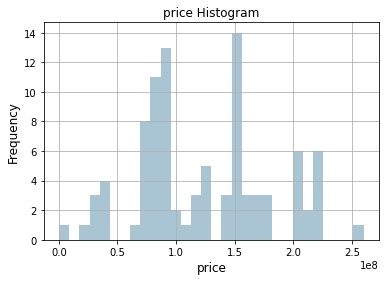

In [ ]:
fig, ax = plt.subplots()
df['price'].hist(bins=30, color='#A9C5D3')
ax.set_title('price Histogram', fontsize=12)
ax.set_xlabel('price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)



In [ ]:


quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['price'].quantile(quantile_list)
quantiles



0.00       340000.0
0.25     85000000.0
0.50    120000000.0
0.75    158750000.0
1.00    260000000.0
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

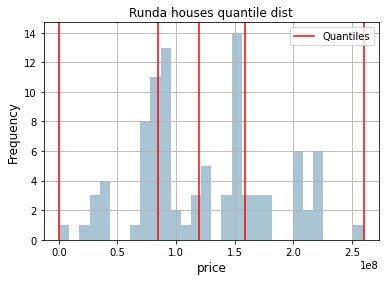

In [ ]:
fig, ax = plt.subplots()
df['price'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Runda houses quantile dist', fontsize=12)
ax.set_xlabel('price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
quantile_labels = ['low','fair','medium','high']

df['price'] = pd.qcut(df['price'], 
                                                 q=quantile_list, labels=quantile_labels)
df.head(10)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],low
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
3,800,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low
4,2833,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' CCTV ', ' Electricity Included ', ' Fibre I...","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",medium
5,2023,8,8,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",medium
6,2023,5,5,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],high
7,506,4,4,"[' Bore Hole ', ' Electric Fence ', ' Fence ',...","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
8,2023,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",high
9,2833,7,5,"[' Bore Hole ', ' Electric Fence ', ' Garden ']","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Built in Cupboards ', ' Ensuite ', ' Kitche...",fair
11,2427,6,6,"[' Balcony ', ' Electric Fence ', ' Fence ', '...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low


In [ ]:
df= df[df['area'] != 0]
df= df[df['baths'] != 0]
df= df[df['beds'] != 0]
df.head(10)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],low
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
3,800,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low
4,2833,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' CCTV ', ' Electricity Included ', ' Fibre I...","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",medium
5,2023,8,8,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",medium
6,2023,5,5,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],high
7,506,4,4,"[' Bore Hole ', ' Electric Fence ', ' Fence ',...","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
8,2023,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",high
9,2833,7,5,"[' Bore Hole ', ' Electric Fence ', ' Garden ']","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Built in Cupboards ', ' Ensuite ', ' Kitche...",fair
11,2427,6,6,"[' Balcony ', ' Electric Fence ', ' Fence ', '...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low


In [ ]:


bin_ranges = [2,4,6,8]
bin_names = [ '2-4 bedrooms','4-6 bedrooms','6-8 bedrooms']

df['beds'] = pd.cut(np.array(df['beds']), 
                                               bins=bin_ranges, labels=bin_names)



df['beds']

0      4-6 bedrooms
1      2-4 bedrooms
3      4-6 bedrooms
4      4-6 bedrooms
5      6-8 bedrooms
           ...     
129    4-6 bedrooms
131    4-6 bedrooms
134    6-8 bedrooms
135    2-4 bedrooms
136    6-8 bedrooms
Name: beds, Length: 94, dtype: category
Categories (3, object): [2-4 bedrooms < 4-6 bedrooms < 6-8 bedrooms]

In [ ]:
bin_ranges = [2,4,6,8]
bin_names = [ '2-4 baths','4-6 baths','6-8 baths']

df['baths'] = pd.cut(np.array(df['baths']), 
                                               bins=bin_ranges, labels=bin_names)



df['baths']

0      6-8 baths
1      2-4 baths
3      4-6 baths
4      4-6 baths
5      6-8 baths
         ...    
129    4-6 baths
131    6-8 baths
134    6-8 baths
135    2-4 baths
136    6-8 baths
Name: baths, Length: 94, dtype: category
Categories (3, object): [2-4 baths < 4-6 baths < 6-8 baths]

In [ ]:
bin_ranges = [500,1000,1500,2000 , 2500,3000]
bin_names = [ '500 - 1000','1000-1500','1500-2000','2000-2500','2500-3000']

df['area'] = pd.cut(np.array(df['area']), 
                                               bins=bin_ranges, labels=bin_names)



df['area'].head(20)

0      2000-2500
1            NaN
3     500 - 1000
4      2500-3000
5      2000-2500
6      2000-2500
7     500 - 1000
8      2000-2500
9      2500-3000
11     2000-2500
12     2500-3000
13     2000-2500
14     2000-2500
15     2000-2500
16     2000-2500
17           NaN
18     2000-2500
19     2000-2500
21     2000-2500
22    500 - 1000
Name: area, dtype: category
Categories (5, object): [500 - 1000 < 1000-1500 < 1500-2000 < 2000-2500 < 2500-3000]

In [ ]:
df.isna().sum()

area                8
baths               1
beds                0
externalFeatures    0
generalFeatures     0
internalFeatures    0
price               0
dtype: int64

In [ ]:
df = df.dropna()

# One hot encoding of features

In [ ]:
# convert to lists
from ast import literal_eval
df.loc[:,'generalFeatures'] = df.loc[:,'generalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'internalFeatures'] = df.loc[:,'internalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'externalFeatures'] = df.loc[:,'externalFeatures'].apply(lambda x: literal_eval(x))

In [ ]:
all_features =set([]) 

def get_all_features(text):
  for i in range(len(text)):
  
   all_features.add(text[i].strip())


for i in range(len(df)):
  get_all_features(df['generalFeatures'].tolist()[i])
  get_all_features(df['internalFeatures'].tolist()[i])
  get_all_features(df['externalFeatures'].tolist()[i])



print("All features ", type(all_features),  all_features)


All features  <class 'set'> {'Aircon', 'Sea View', 'Water Included', 'Garden', 'Electric Fence', 'Walk In Closet', 'Pets Allowed', 'Scenic View', 'Fibre Internet', 'Built in Cupboards', 'Electricity Included', 'Kitchen', 'Alarm', 'Golf Course', 'CCTV', 'Ensuite', 'Fence', 'Balcony', 'Bore Hole', 'Backup Generator', 'Lift Elevator', 'Wheel Chair Friendly'}


We first need to turn the features to individual column names with intial values of zero. Then iterate trhough the df giving a 1 to a house that has a feature.

In [ ]:
# turn all features to column names
for feature in all_features:
  df[feature] = [0] * len(df)
 
df.head(2)  

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price,Aircon,Sea View,Water Included,Garden,Electric Fence,Walk In Closet,Pets Allowed,Scenic View,Fibre Internet,Built in Cupboards,Electricity Included,Kitchen,Alarm,Golf Course,CCTV,Ensuite,Fence,Balcony,Bore Hole,Backup Generator,Lift Elevator,Wheel Chair Friendly
0,2000-2500,6-8 baths,4-6 bedrooms,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500 - 1000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Pets Allowed , ...","[ Aircon , Alarm , Built in Cupboards , Ens...",low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def populate_feature( j, text):
   for i in range(len(text)):
     a = text[i].strip()
   
     df[a][j] = 1

for i in range(len(df)):
  populate_feature(i ,df['generalFeatures'].tolist()[i])
  populate_feature(i , df['internalFeatures'].tolist()[i])
  populate_feature(i ,df['externalFeatures'].tolist()[i])

df.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price,Aircon,Sea View,Water Included,Garden,Electric Fence,Walk In Closet,Pets Allowed,Scenic View,Fibre Internet,Built in Cupboards,Electricity Included,Kitchen,Alarm,Golf Course,CCTV,Ensuite,Fence,Balcony,Bore Hole,Backup Generator,Lift Elevator,Wheel Chair Friendly
0,2000-2500,6-8 baths,4-6 bedrooms,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],low,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0
3,500 - 1000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Pets Allowed , ...","[ Aircon , Alarm , Built in Cupboards , Ens...",low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop(['externalFeatures','generalFeatures','internalFeatures'], axis=1)

# Model

In [ ]:
df.shape

(85, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 136
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   area                  85 non-null     category
 1   baths                 85 non-null     category
 2   beds                  85 non-null     category
 3   price                 85 non-null     category
 4   Aircon                85 non-null     int64   
 5   Sea View              85 non-null     int64   
 6   Water Included        85 non-null     int64   
 7   Garden                85 non-null     int64   
 8   Electric Fence        85 non-null     int64   
 9   Walk In Closet        85 non-null     int64   
 10  Pets Allowed          85 non-null     int64   
 11  Scenic View           85 non-null     int64   
 12  Fibre Internet        85 non-null     int64   
 13  Built in Cupboards    85 non-null     int64   
 14  Electricity Included  85 non-null     int64   
 15  Kitchen

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['price'] = LE.fit_transform(df['price'])
df['beds'] = LE.fit_transform(df['beds'])
df['baths'] = LE.fit_transform(df['baths'])
df['area'] = LE.fit_transform(df['area'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 136
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   area                  85 non-null     int64
 1   baths                 85 non-null     int64
 2   beds                  85 non-null     int64
 3   price                 85 non-null     int64
 4   Aircon                85 non-null     int64
 5   Sea View              85 non-null     int64
 6   Water Included        85 non-null     int64
 7   Garden                85 non-null     int64
 8   Electric Fence        85 non-null     int64
 9   Walk In Closet        85 non-null     int64
 10  Pets Allowed          85 non-null     int64
 11  Scenic View           85 non-null     int64
 12  Fibre Internet        85 non-null     int64
 13  Built in Cupboards    85 non-null     int64
 14  Electricity Included  85 non-null     int64
 15  Kitchen               85 non-null     int64
 16  Alarm    

In [ ]:
df.head(10)

,area,baths,beds,price,Aircon,Sea View,Water Included,Garden,Electric Fence,Walk In Closet,Pets Allowed,Scenic View,Fibre Internet,Built in Cupboards,Electricity Included,Kitchen,Alarm,Golf Course,CCTV,Ensuite,Fence,Balcony,Bore Hole,Backup Generator,Lift Elevator,Wheel Chair Friendly
0,2,2,1,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0
3,4,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,3,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.rename(columns={'price': 'Class'}, inplace=True)

In [ ]:
df.head(10)

,area,baths,beds,Class,Aircon,Sea View,Water Included,Garden,Electric Fence,Walk In Closet,Pets Allowed,Scenic View,Fibre Internet,Built in Cupboards,Electricity Included,Kitchen,Alarm,Golf Course,CCTV,Ensuite,Fence,Balcony,Bore Hole,Backup Generator,Lift Elevator,Wheel Chair Friendly
0,2,2,1,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0
3,4,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,3,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.isna().sum()

area                    0
baths                   0
beds                    0
Class                   0
Aircon                  0
Sea View                0
Water Included          0
Garden                  0
Electric Fence          0
Walk In Closet          0
Pets Allowed            0
Scenic View             0
Fibre Internet          0
Built in Cupboards      0
Electricity Included    0
Kitchen                 0
Alarm                   0
Golf Course             0
CCTV                    0
Ensuite                 0
Fence                   0
Balcony                 0
Bore Hole               0
Backup Generator        0
Lift Elevator           0
Wheel Chair Friendly    0
dtype: int64

In [ ]:
df.isnull().sum()

area                    0
baths                   0
beds                    0
Class                   0
Aircon                  0
Sea View                0
Water Included          0
Garden                  0
Electric Fence          0
Walk In Closet          0
Pets Allowed            0
Scenic View             0
Fibre Internet          0
Built in Cupboards      0
Electricity Included    0
Kitchen                 0
Alarm                   0
Golf Course             0
CCTV                    0
Ensuite                 0
Fence                   0
Balcony                 0
Bore Hole               0
Backup Generator        0
Lift Elevator           0
Wheel Chair Friendly    0
dtype: int64

# SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
new_cols = [col for col in df.columns if col != 'Class'] + ['Class']
df = df[new_cols]
df.head(4)

,area,baths,beds,Aircon,Sea View,Water Included,Garden,Electric Fence,Walk In Closet,Pets Allowed,Scenic View,Fibre Internet,Built in Cupboards,Electricity Included,Kitchen,Alarm,Golf Course,CCTV,Ensuite,Fence,Balcony,Bore Hole,Backup Generator,Lift Elevator,Wheel Chair Friendly,Class
0,2,2,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,2
3,4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
x= df.iloc[:,0:26].values.astype(int)
y= df.iloc[:,25].values.astype(int)

In [ ]:
x

array([[2, 2, 1, ..., 0, 0, 2],
       [4, 1, 1, ..., 0, 1, 2],
       [3, 1, 1, ..., 0, 0, 3],
       ...,
       [2, 2, 2, ..., 0, 0, 3],
       [2, 0, 0, ..., 0, 0, 2],
       [2, 2, 2, ..., 0, 0, 0]])

In [ ]:
y

array([2, 2, 3, 3, 1, 2, 1, 0, 2, 3, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2,
       0, 3, 2, 3, 0, 1, 3, 3, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 3, 3,
       2, 3, 2, 3, 0, 2, 2, 1, 0, 0, 1, 3, 1, 0, 1, 3, 0, 3, 2, 1, 1, 2,
       0, 2, 0, 2, 1, 3, 2, 2, 0, 0, 3, 0, 3, 3, 3, 1, 3, 2, 0])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=np.random.seed(7))

In [ ]:
from sklearn.preprocessing import StandardScaler
# normalise
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
pip install wandb

     |████████████████████████████████| 1.6MB 5.1MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 163kB 32.5MB/s 
     |████████████████████████████████| 122kB 32.1MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=de6de5a92528b925d69a328b0b662c0f9b9a5f37eb55314197e7cae7be4c8179
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=a63cbb8cecaadbc9adcda51da92ade221fb471ba3809626c0a7a871a41f65e45
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=4e0a879d5e71cf10cee7c810f4a0f5105ea3fb257b98a8

# Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,classification_report
from sklearn.linear_model import LogisticRegression
import wandb
import time


In [ ]:
def train_eval_pipeline(model,train_data,test_data,name):
  #Initialize Weights and Biases 
  wandb.init(project="Logistic Example Using Runda Houses Manually Cleaned Dataset", name=name)
  #segregate the datasets
  (x_train,y_train)=train_data
  (x_test,y_test)=test_data
 
  # train and log all the necessary metrics
  start=time.time()
  model.fit(x_train,y_train)
  end=time.time()-start
  prediction=model.predict(x_test)
  wandb.log({"accuracy": accuracy_score(y_test,prediction)*100.0,
             "precision": precision_recall_fscore_support(y_test,prediction,average='macro')[0],
             'recall': precision_recall_fscore_support(y_test,prediction,average='macro')[1],
             'Training_time':end})
  print("Accuracy score of the Logistic Regression Classifier with default hyperparameter values {0:.2f}%"\
  .format(accuracy_score(y_test,prediction)*100.0))
  print('\n')
  print("---Classification report of the Logistic Regression classifier with default hyperparameter values----")
  print('\n')
  print(classification_report(y_test,prediction,target_names=['low ','fair ', 'medium', 'overpriced'])) 



In [ ]:
logreg = LogisticRegression()

In [ ]:
train_eval_pipeline(logreg,(x_train, y_train),(x_test,y_test),'Logisitc_regression')

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://app.wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: wamaitha (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.1
wandb: Run data is saved locally in wandb/run-20200919_125745-32znfxcc
wandb: Syncing run Logisitc_regression



Accuracy score of the Logistic Regression Classifier with default hyperparameter values 94.12%


---Classification report of the Logistic Regression classifier with default hyperparameter values----


              precision    recall  f1-score   support

        low        1.00      0.75      0.86         4
       fair        0.88      1.00      0.93         7
      medium       1.00      1.00      1.00         4
  overpriced       1.00      1.00      1.00         2

    accuracy                           0.94        17
   macro avg       0.97      0.94      0.95        17
weighted avg       0.95      0.94      0.94        17



In [ ]:
# import gridsearchcv
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
penalty = ['l2']

C = [0.8, 0.9, 1.0]

tol = [0.01, 0.001,0.0001]

max_iter = [100,150,200,250]

# create a dictionary where tol and max_iter are keys and the list of their values are the corresponding values

param_grid = dict(penalty=penalty, C=C, max_iter=max_iter)

param_grid

{'C': [0.8, 0.9, 1.0], 'max_iter': [100, 150, 200, 250], 'penalty': ['l2']}

In [ ]:
# Instanstiate a random searcg with the required param
random_model = RandomizedSearchCV(estimator=logreg , param_distributions=param_grid, cv=5)

In [ ]:
random_model

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.8, 0.9, 1.0],
                                        'max_iter': [100, 150, 200, 250],
                                        'penalty': ['l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
          

In [ ]:
random_model_result = random_model.fit(x_train, y_train)

In [ ]:
# summarised results

best_score , best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score : %.2f using %s " %(best_score*100, best_params)) 

Best score : 95.60 using {'penalty': 'l2', 'max_iter': 250, 'C': 0.9} 


In [ ]:
config = wandb.config
config.tol = 0.01
config.penalty ='l2'
config.C = 0.9

In [ ]:
# Train the model
logreg = LogisticRegression(tol=config.tol, penalty=config.penalty, max_iter=100,C=config.C)


In [ ]:
train_eval_pipeline(logreg,(x_train, y_train) , (x_test, y_test), 'Logistic Regression Random Search')

wandb: Waiting for W&B process to finish, PID 345
wandb: Program ended successfully.


wandb:                                                                                
wandb: Find user logs for this run at: wandb/run-20200919_125745-32znfxcc/logs/debug.log
wandb: Find internal logs for this run at: wandb/run-20200919_125745-32znfxcc/logs/debug-internal.log
wandb: Run summary:
wandb:        accuracy 94.11764705882352
wandb:       precision 0.96875
wandb:          recall 0.9375
wandb:   Training_time 0.040793657302856445
wandb:           _step 0
wandb:        _runtime 0
wandb:      _timestamp 1600520266
wandb: Run history:
wandb:        accuracy ▁
wandb:       precision ▁
wandb:          recall ▁
wandb:   Training_time ▁
wandb:           _step ▁
wandb:        _runtime ▁
wandb:      _timestamp ▁
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Synced Logisitc_regression: https://app.wandb.ai/wamaitha/Logistic%20Example%20Using%20Runda%20Houses%20Manually%20Cleaned%20Dataset/runs/32znfxcc
wandb: Tracking run with wandb


Accuracy score of the Logistic Regression Classifier with default hyperparameter values 94.12%


---Classification report of the Logistic Regression classifier with default hyperparameter values----


              precision    recall  f1-score   support

        low        1.00      0.75      0.86         4
       fair        0.88      1.00      0.93         7
      medium       1.00      1.00      1.00         4
  overpriced       1.00      1.00      1.00         2

    accuracy                           0.94        17
   macro avg       0.97      0.94      0.95        17
weighted avg       0.95      0.94      0.94        17



# PCA

In [ ]:
# https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([4.35027480e-01, 1.44990073e-01, 1.19142604e-01, 7.83801166e-02,
       7.06876396e-02, 6.84083242e-02, 5.32750786e-02, 1.85340404e-02,
       1.15546432e-02, 1.30284593e-32, 2.39030326e-33, 2.39030326e-33,
       2.39030326e-33, 2.39030326e-33, 2.39030326e-33, 2.39030326e-33,
       2.39030326e-33, 2.39030326e-33, 2.39030326e-33, 2.39030326e-33,
       2.39030326e-33, 2.39030326e-33, 2.39030326e-33, 2.39030326e-33,
       2.39030326e-33, 9.03542796e-34])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
train_eval_pipeline(logreg,(x_train, y_train) , (x_test, y_test), 'Logistic Regression PCA 1')

wandb: Waiting for W&B process to finish, PID 385
wandb: Program ended successfully.


wandb:                                                                                
wandb: Find user logs for this run at: wandb/run-20200919_125747-e6ztbfmo/logs/debug.log
wandb: Find internal logs for this run at: wandb/run-20200919_125747-e6ztbfmo/logs/debug-internal.log
wandb: Run summary:
wandb:        accuracy 94.11764705882352
wandb:       precision 0.96875
wandb:          recall 0.9375
wandb:   Training_time 0.031847476959228516
wandb:           _step 0
wandb:        _runtime 0
wandb:      _timestamp 1600520272
wandb: Run history:
wandb:        accuracy ▁
wandb:       precision ▁
wandb:          recall ▁
wandb:   Training_time ▁
wandb:           _step ▁
wandb:        _runtime ▁
wandb:      _timestamp ▁
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Synced Logistic Regression Random Search: https://app.wandb.ai/wamaitha/Logistic%20Example%20Using%20Runda%20Houses%20Manually%20Cleaned%20Dataset/runs/e6ztbfmo
wandb: Tracking 


Accuracy score of the Logistic Regression Classifier with default hyperparameter values 23.53%


---Classification report of the Logistic Regression classifier with default hyperparameter values----


              precision    recall  f1-score   support

        low        0.00      0.00      0.00         4
       fair        0.00      0.00      0.00         7
      medium       0.24      1.00      0.38         4
  overpriced       0.00      0.00      0.00         2

    accuracy                           0.24        17
   macro avg       0.06      0.25      0.10        17
weighted avg       0.06      0.24      0.09        17



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
